In [16]:
from keras.models import load_model # 학습된 모델을 불러와서 사용하기 위해
import glob # 폴더의 모든 하위폴더까지 탐색해서 확장자가 jpg인 파일 가져오기 위해 사용
from matplotlib import pyplot as plt #데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지로 그림을 표시하기 위해 사용
model = load_model('model/69.9_model.h5')


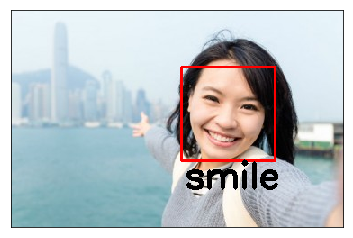

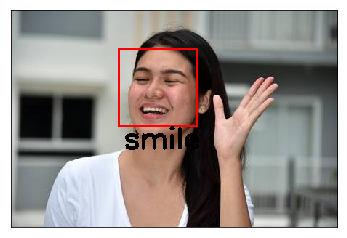

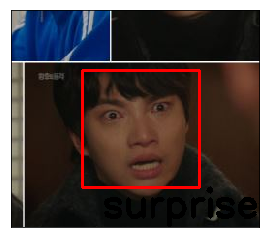

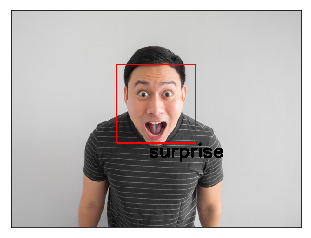

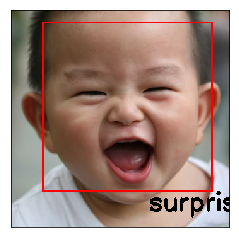

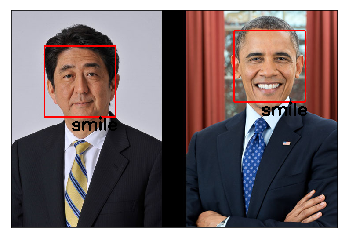

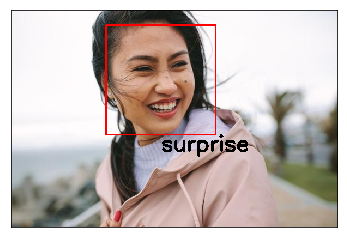

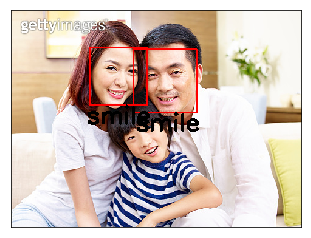

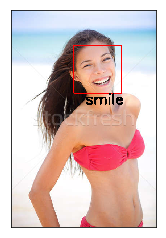

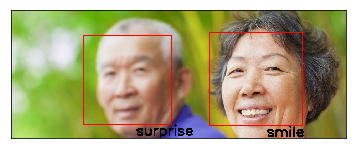

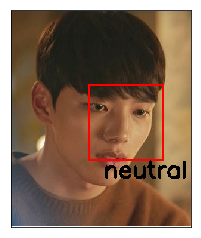

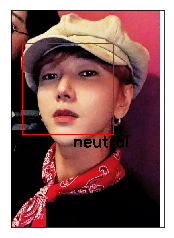

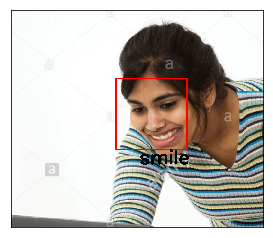

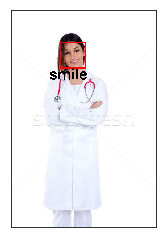

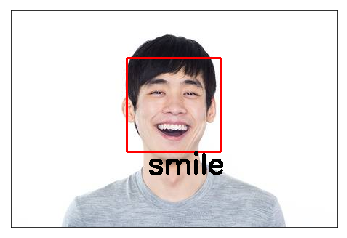

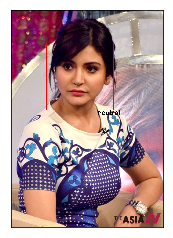

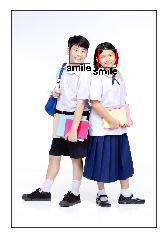

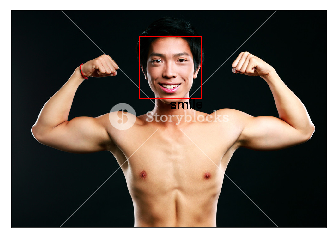

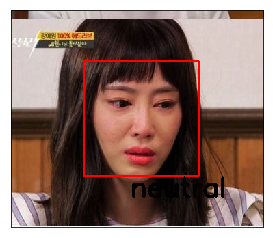

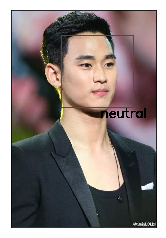

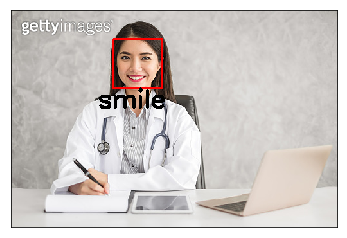

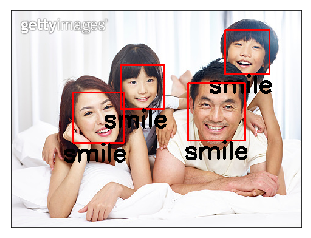

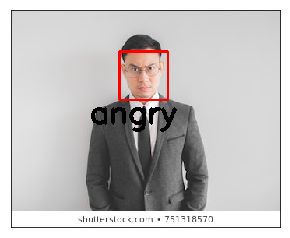

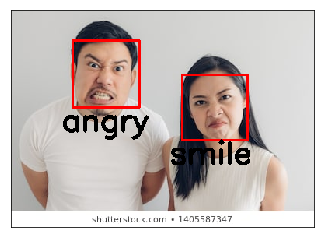

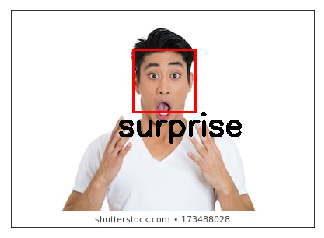

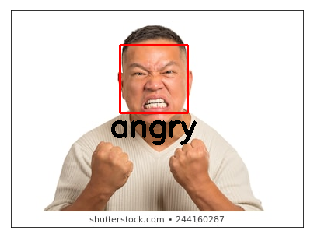

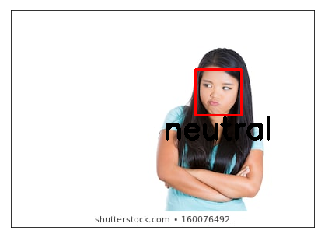

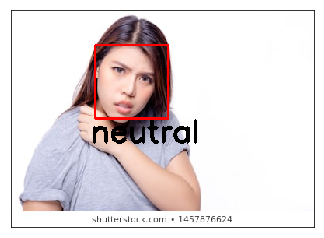

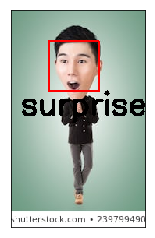

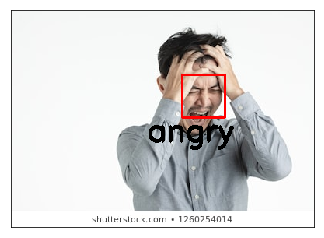

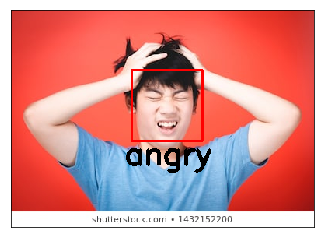

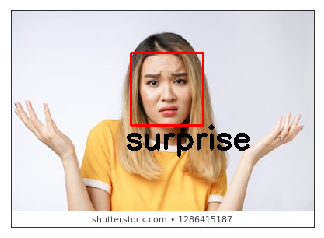

In [263]:


    
caltech_dir = "dataset/test/" # 테스트 데이터 폴더 경로
files = glob.glob(caltech_dir+"/*.jpg") # 테스트할 사진 파일들 전체 가져오기
global answer # 테스트 결과 리스트
answer=[]

# 테스트 이미지 하나씩 가져오기
for i, f in enumerate(files): 
    
#   openCV를 통하여 이미지 가져오기
    view_img = cv2.imread(f)
    
    
#   matplotlib으로 화면에 컬러로 출력하기 위해.
#   openCV의 BGR을 RGB로 바꾸어 줍니다.
    view_img = cv2.cvtColor(view_img, cv2.COLOR_BGR2RGB)
    

# 사진에서 얼굴을 추출한 뒤
# 추출된 얼굴에서 예측을 합니다.
    emotion_recognition(view_img)
    

    
resultPrint()
    
    
    
    



In [186]:
def resultPrint():
    global answer # 테스트 결과 리스트
    for img in answer:
        plt.imshow(img) # 그냥 이미지 표시
        # x축 숫자표시 안나오게
        plt.xticks([])
        # y축 숫자표시 안나오게
        plt.yticks([])
        plt.show()
    

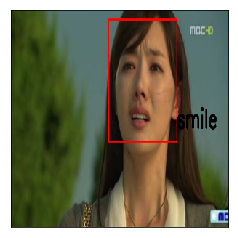

In [161]:
import cv2
import numpy as np
from matplotlib import pyplot as plt    


# f= 'dataset/test/7.932775232.jpg'
f='dataset/test/36.crop.jpg'

view_img = cv2.imread(f, )
view_img = cv2.cvtColor(view_img, cv2.COLOR_BGR2RGB)
face_extractor(view_img)

# 예측 후 사이즈 변경
view_img = cv2.resize(view_img,(300, 300))
plt.imshow(view_img) # 그냥 이미지 표시

# x축 숫자표시 안나오게
plt.xticks([])
# y축 숫자표시 안나오게
plt.yticks([])
plt.show()

# model.prediect();

In [262]:
# 사진에서 얼굴을 추출한 뒤
# 검출된 얼굴에서 예측을 합니다.

def emotion_recognition(img):
    global answer  # 테스트 결과 리스트
    
        
#   얼굴을 검출하기 미리 학습시켜 놓은 XML 포맷으로 저장된 분류기를 로드합니다. 
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    

    
    #얼굴 찾기 
    faces = face_classifier.detectMultiScale( cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  ,1.3,5)
    #찾은 얼굴이 없으면 None으로 리턴 
    if faces is():
        return None
    #얼굴들이 있으면 
    for(x,y,w,h) in faces:
        #해당 얼굴 크기만큼 cropped_face에 잘라 넣기 
        #근데... 얼굴이 2개 이상 감지되면??
        #가장 마지막의 얼굴만 남을 듯
        cropped_face = img[y:y+h, x:x+w]
        cropped_face = cv2.resize(cropped_face,(48,48))
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), thickness=2)
        label= pre(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY))
        cv2.putText(img, label, (x+w-100, y+h+30), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0,0,0), 3)
    
    answer.append(img)

    #cropped_face 리턴 

In [234]:
import cv2
import numpy as np

def pre(img):

    categories = ["neutral","angry","surprise","smile","sad"]  # 각 dataset 폴더이름
    img = img.reshape(-1,48,48,1)
    predict = model.predict(img)
    
    
    return categories[np.argmax(predict)]

# model.prediect();